# Nome do Grupo: Milotech

#Integrantes:

RM553472 Claudio Bispo

RM552981 Patricia Naomi Yamagishi

RM553568 Sabrina da Motta Café

# Solicitação da matéria de IA

Para o entregável da nossa disciplina, vocês realizarão todas as etapas que fazem parte do dia a dia de um cientista
de dados. São fornecidos 4 arquivos csv (Teams e Portal) com diferentes informações sobre poluição envolvendo
plástico, e um arquivo com informações de qualidade de água para diferentes regiões. Uma coluna em comum
entre todas as bases (chave primária) de dados é a coluna Entidade, que contém o nome do país associado.

# Requisitos:
╸ [30 pts] Fazer uma análise exploratória de dados com os arquivos 1 a 4 (ao menos um gráfico para cada
arquivo), gerando visualizações que possam trazer insights sobre a relação do plástico com o oceano e a
poluição.

╸ [30 pts] Queremos treinar um modelo de ML para predizer a qualidade da água do oceano com base em
dados de plástico. Combine o arquivo 5 com os arquivos de 1 a 4 (se guiando pela chave primária, e
lembrando que dados do mundo real possuem problemas que precisam de atenção especial). Após juntar os
dados, treine um modelo para predizer a qualidade da água com base nas outras colunas.

In [1]:
#--------------------( Importações dos dados ) --------------------#


# Analise dos dados
import pandas as pd


#--------------------( Gerar gráficos ) --------------------#

import matplotlib.pyplot as plt
import seaborn as sns

#--------------------( Realizar as previsoes) --------------------#

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#--------------------( Regressão ) --------------------#

from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

#--------------------( Classificação ) --------------------#

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Analise da producao de plastico



## 1.1. Dados que estão disponíveis neste arquivo


•	Entidade: Nome do país ou região (no caso dos primeiros registros, “Mundo”).

•	Ano: O ano de registro da produção.

•	Produção Anual de Plástico: Quantidade de plástico produzido, estamos fazendo referencia em toneladas.

## 1.2. Carregamento dos dados

In [2]:

# Carregar o arquivo CSV
df_producao_plastico = pd.read_csv('1- producao-de-plastico-global.csv')

# Exibir as primeiras  cinco linhas do dataframe e informações gerais para entendermos melhor o problema
df_producao_plastico.head()

,Entidade,Ano,Produção Anual de Plástico
0,Mundo,1950,2000000
1,Mundo,1951,2000000
2,Mundo,1952,2000000
3,Mundo,1953,3000000
4,Mundo,1954,3000000


## 1.3. Criação do gráfico

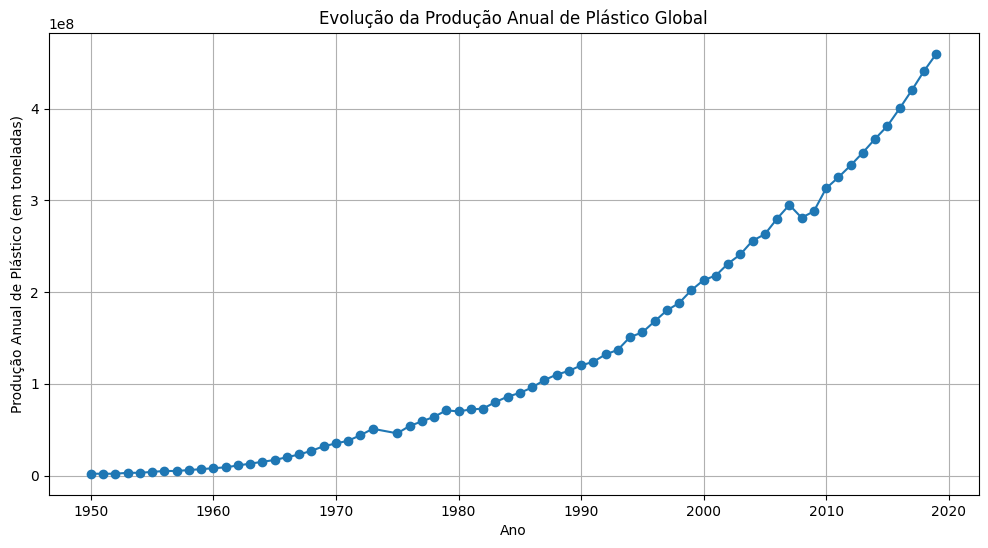

In [3]:

# Criacao um grafico de linha para visualizar a produção de plástico ao longo dos anos
plt.figure(figsize=(12, 6))
plt.plot(df_producao_plastico['Ano'], df_producao_plastico['Produção Anual de Plástico'], marker='o')
plt.title('Evolução da Produção Anual de Plástico Global')
plt.xlabel('Ano')
plt.ylabel('Produção Anual de Plástico (em toneladas)')
plt.grid(True)
plt.show()

## 1.4. Análise GLOBAL sobre o tema Produçao de Plastico


Para analisar o crescimento evidente da produção anual de plásticos ao londo dos anos (1950-2020), fatos históricos devem ser considerados.

**Invenção e Desenvolvimento Inicial dos Plásticos totalmente sintéticos (1907-1930s):**

Devido o aumento do uso da eletricidade nos EUA em 1907, Leo Baekeland inventou
a baquelite, o primeiro plástico totalmente sintético, que se mostrou um eficaz isolante, com ótima durabilidade, resistênte ao calor e pode ser moldada em quase qualquer coisa. Em um mundo em que os recursos naturais estão cada vez mais escassos materiais como esse atraem muito investimento industrial.

Em 1939 com o início da Segunda Guerra Mundial, o poder industrial era tão importante quanto a vitória militar. A necessidade de preservar os escassos recursos naturais tornou a produção de alternativas sintéticas uma prioridade. A utilização do plástico foinecessária para fabricar pára-quedas, cordas, coletes à prova de balas, forros de capacete e muito mais.

fonte: https://www.openaccessgovernment.org/the-plastic-timeline-how-did-we-get-here/102481/

https://www.sciencehistory.org/education/classroom-activities/role-playing-games/case-of-plastics/history-and-future-of-plastics/

**Expansão Pós-Guerra (1950-1970s):**

Após a Segunda Guerra Mundial, a produção de plástico aumentou significativamente. Produtos plásticos se tornaram populares em bens de consumo devido à sua versatilidade e custo baixo. Isso é refletido no gráfico pelo crescimento acentuado na produção a partir da década de 1950

fonte: https://www.openaccessgovernment.org/the-plastic-timeline-how-did-we-get-here/102481/

https://www.sciencehistory.org/education/classroom-activities/role-playing-games/case-of-plastics/history-and-future-of-plastics/

**Crescimento da Indústria e Globalização (1980s-2000s):**

A industrialização rápida e a globalização impulsionaram ainda mais a produção de plástico. A demanda por embalagens e produtos de consumo contribuiu para o aumento contínuo. A partir dos anos 1990, a industrialização em países em desenvolvimento também desempenhou um papel importante​.

fonte: https://www.openaccessgovernment.org/the-plastic-timeline-how-did-we-get-here/102481/

https://www.grida.no/resources/6923

**Consciência Ambiental e Regulação (2000s em diante):**

Apesar da crescente conscientização sobre os impactos ambientais dos plásticos e dos esforços regulatórios para reduzir o uso de plásticos de uso único, a produção continuou a crescer devido à demanda contínua e à expansão do comércio eletrônico, que aumenta a necessidade de embalagens plásticas​

fonte: https://www.openaccessgovernment.org/the-plastic-timeline-how-did-we-get-here/102481/

https://oceangeneration.org/history-plastic-pollution/



### 1.4.1 Análise sobre o gráfico

Análise sobre o gráfico mostra a evolução da produção anual de plástico global ao longo dos anos. É evidente um aumento significativo na produção à medida que avançamos no tempo, o que pode ser um indicativo da crescente contribuição para a poluição por plástico, especialmente nos oceanos. Os dados iniciaram em 1950 e temos uma base ate 2020, o que mostra uma base bem consolidade de quase 70 anos. O numero vem so aumentando e somente tivemos melhorias mas curtas nos anos 70,80,2008 aproximadamente.

# 2. Analise Despejo de resíduos

## 2.1. Dados que estao disponiveis neste arquivo

•	Entidade: Nome do país ou região.

•	Código: Código do país (alguns valores estão faltando). Esse codigo sera nosso ID principal.

•	Ano: Ano do registro de dados.

•	Participação na emissão global de plásticos para o oceano: Percentual que cada entidade contribui para a emissão global de plásticos no oceano.

## 2.2. Carregamento dos dados

In [4]:

df_residuos = pd.read_csv('2- participacao-despejo-residuo-plastico.csv')

df_residuos.head()

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204


## 2.3. Criação do gráfico

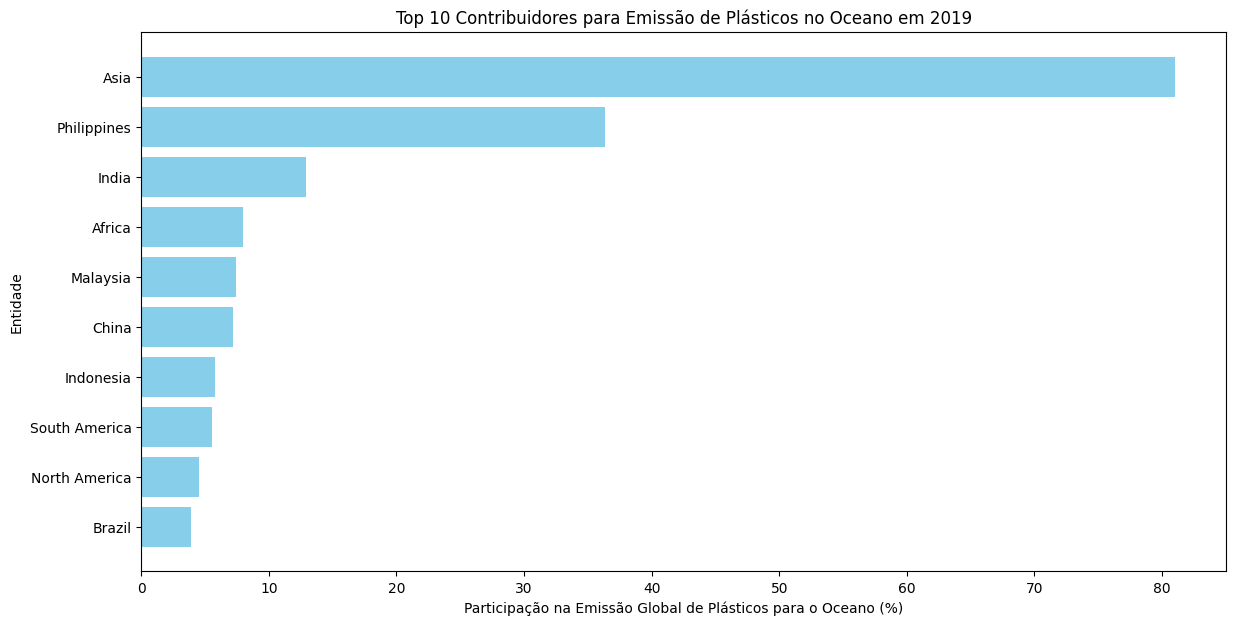

In [5]:
# Filtrar os dados para o ano mais recente disponível, 2019. Nao desejo saber dos demais aqui, por hora.
data_2019 = df_residuos[df_residuos['Ano'] == 2019]

# Ordenar os dados pelo percentual de emissão de plásticos para o oceano
sorted_data_2019 = data_2019.sort_values(by='Participação na emissão global de plásticos para o oceano', ascending=False).head(10)

# Criar um gráfico de barras
plt.figure(figsize=(14, 7))
plt.barh(sorted_data_2019['Entidade'], sorted_data_2019['Participação na emissão global de plásticos para o oceano'], color='skyblue')
plt.title('Top 10 Contribuidores para Emissão de Plásticos no Oceano em 2019')
plt.xlabel('Participação na Emissão Global de Plásticos para o Oceano (%)')
plt.ylabel('Entidade')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior contribuidor aparecer no topo
plt.show()

# 2.4. Analise sobre os residuos

No gráfico acima, mostramos os 10 principais contribuidores para a emissão de plásticos no oceano no ano de 2019. Esta visualização ajuda a destacar quais países ou regiões são responsáveis por uma maior parcela da poluição plástica nos oceanos. Para uma melhor Análise vamos nos atentar ao Brasil e à Ásia em alguns de seus países.

Filipinas: Ao contrário da crença popular, a maior parte dos resíduos plásticos não entra diretamente no mar. Por outro lado, chega ao mar a partir de riachos menores. De acordo com um estudo de 2021 , 80% dos resíduos plásticos vêm dos rios e sete dos dez rios mais poluídos por plástico do mundo estão nas Filipinas. A falta de infraestrutura adequada para gestão de resíduos e a alta densidade populacional em áreas costeiras exacerbam o problema​.

Índia: A Índia é outro grande poluidor, com desafios semelhantes aos das Filipinas, incluindo a gestão ineficiente de resíduos e a prática generalizada de descarte inadequado de lixo​.

China: Até 2017, o país era o maior importador de plástico . Desde a introdução da proibição de importação de resíduos em 2018, incluindo diferentes tipos de plásticos, as coisas mudaram drasticamente. A proibição reduziu efetivamente para metade a quantidade de resíduos importados. Em última análise, a China foi responsável por apenas 7,22% da poluição global por plástico oceânico em 2019.

Brasil: No Brasil, cerca de 3,44 milhões de toneladas de plástico são descartadas nos oceanos anualmente. A gestão inadequada de resíduos e a baixa cobertura de coleta seletiva são fatores que contribuem para a poluição. Estudos apontam que resíduos de plástico, como pneus de veículos e fibras sintéticas, são comumente encontrados em áreas costeiras e na Baía de Paranaguá.

fonte: https://www.philstar.com/headlines/2021/06/10/2104533/pasig-other-philippine-rivers-among-biggest-contributors-ocean-plastic-pollution
https://earth.org/philippines-plastic/

https://revistapesquisa.fapesp.br/en/brazil-dumps-3-44-million-tons-of-plastic-waste-into-the-sea-every-year/

# 3. Analise sobre o Destino dos plasticos



# 3.1. Dados que estao disponiveis neste arquivo


•	Entidade: Nome do país ou região.

•	Código: Código do país (com muitos valores faltantes).

•	Ano: Ano dos dados.

•	Participação da reciclagem do lixo total regional: Percentual do lixo que foi reciclado na região.

•	Participação da queima do lixo total regional: Percentual do lixo que foi queimado na região.

•	Participação do lixo descartado e mal gerido do total regional: Percentual do lixo que foi descartado ou mal gerido.

•	Participação do lixo encaminhado para aterros do total regional: Percentual do lixo que foi encaminhado para aterros.

## 3.2. Carregamento dos dados

In [6]:

df_destino = pd.read_csv('3- destino-plastico.csv')

df_destino.head(), df_destino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entidade                                                          200 non-null    object 
 1    Código                                                           80 non-null     object 
 2    Ano                                                              200 non-null    int64  
 3    Participação da reciclagem do lixo total regional                200 non-null    float64
 4    Participação da queima do lixo total regional                    200 non-null    float64
 5    Participação do lixo descartado e mal gerido do total regional   200 non-null    float64
 6    Participação do lixo encaminhado para aterros do total regional  200 non-null    float64
dtypes: float64(4), int64(1), object(2)
m

(               Entidade  Código   Ano  \
 0  Americas (excl. USA)     NaN  2000   
 1  Americas (excl. USA)     NaN  2001   
 2  Americas (excl. USA)     NaN  2002   
 3  Americas (excl. USA)     NaN  2003   
 4  Americas (excl. USA)     NaN  2004   
 
     Participação da reciclagem do lixo total regional  \
 0                                           4.721963    
 1                                           4.972505    
 2                                           5.227469    
 3                                           5.482511    
 4                                           5.740007    
 
     Participação da queima do lixo total regional  \
 0                                        1.220057   
 1                                        1.208672   
 2                                        1.197566   
 3                                        1.186352   
 4                                        1.175283   
 
     Participação do lixo descartado e mal gerido do total regional  \

## 3.3. Criação do gráfico

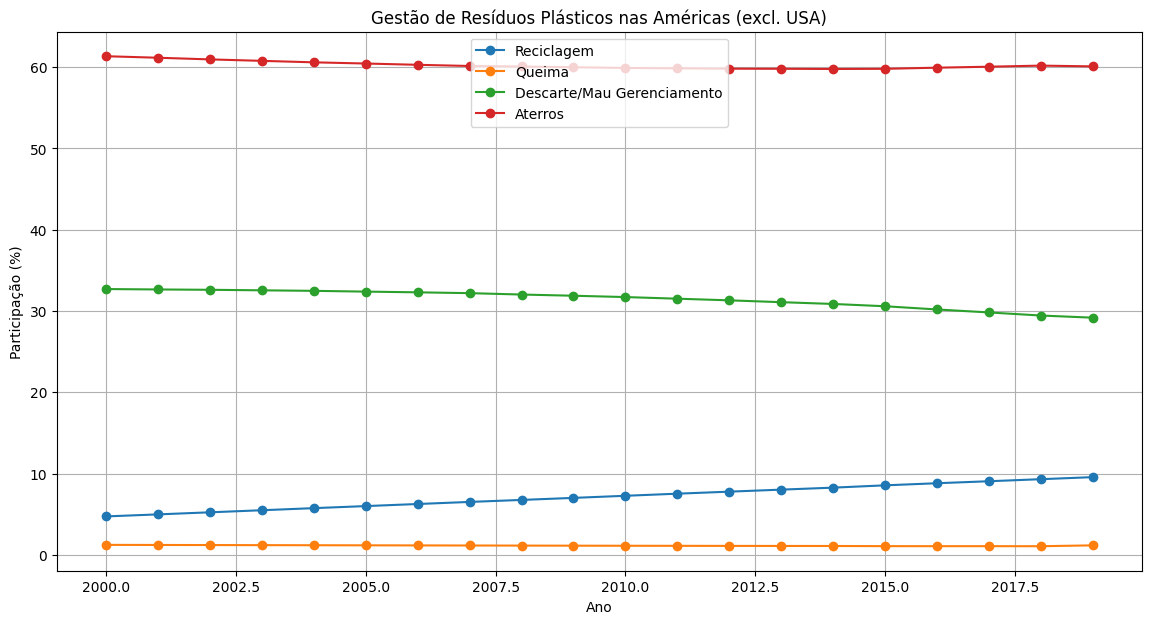

In [7]:
# Corrigir o nome das colunas (removendo espaços adicionais)
df_destino.columns = df_destino.columns.str.strip()

# Refazer a filtragem para a região "Americas (excl. USA)"
americas_data = df_destino[df_destino['Entidade'] == 'Americas (excl. USA)']

# Criar novamente o gráfico de linhas para visualizar as tendências na gestão de resíduos
plt.figure(figsize=(14, 7))
plt.plot(americas_data['Ano'], americas_data['Participação da reciclagem do lixo total regional'], label='Reciclagem', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação da queima do lixo total regional'], label='Queima', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação do lixo descartado e mal gerido do total regional'], label='Descarte/Mau Gerenciamento', marker='o')
plt.plot(americas_data['Ano'], americas_data['Participação do lixo encaminhado para aterros do total regional'], label='Aterros', marker='o')
plt.title('Gestão de Resíduos Plásticos nas Américas (excl. USA)')
plt.xlabel('Ano')
plt.ylabel('Participação (%)')
plt.legend()
plt.grid(True)
plt.show()

# 3.4 Analise sobre o Destino do Plástico

O gráfico acima ilustra as tendências na gestão de resíduos plásticos na região das Américas (excluindo os EUA) ao longo dos anos. Ele mostra a participação percentual de diferentes métodos de tratamento de resíduos, incluindo reciclagem, queima, descarte/mal gerenciamento e encaminhamento para aterros.

Algumas informações históricas e fontes relevantes para contextualizar esses dados:

**Reciclagem:**
A taxa de reciclagem de plásticos tem aumentado lentamente ao longo dos anos, mas ainda representa uma pequena parte da gestão total de resíduos plásticos. Em muitos países da América Latina, a infraestrutura de reciclagem ainda está em desenvolvimento. Melhores políticas de reciclagem e investimento em infraestrutura são necessários para aumentar essa taxa​.

**Queima:**
A queima de resíduos plásticos é uma prática menos comum na região devido aos seus impactos ambientais negativos, incluindo a emissão de gases tóxicos. Essa prática é mais prevalente em países onde a capacidade de gerenciamento de resíduos é limitada​.

**Descarte/Mau Gerenciamento:**
Uma grande porcentagem dos resíduos plásticos ainda é mal gerenciada, resultando em descarte inadequado que pode levar à poluição marinha. A falta de sistemas eficazes de coleta e tratamento de resíduos contribui significativamente para este problema.

**Aterros Sanitários:**
A maioria dos resíduos plásticos na América Latina é destinada a aterros sanitários. Embora essa seja uma solução temporária, a capacidade dos aterros está se esgotando, e muitos países estão enfrentando desafios relacionados ao manejo sustentável de resíduos

A análise desses dados destaca a necessidade urgente de melhorias na gestão de resíduos plásticos na região.

Fontes: https://ourworldindata.org/plastic-pollution

https://www.weforum.org/agenda/2022/05/plastic-waste-generation-new-highs-us-report/

https://www.weforum.org/agenda/2022/05/plastic-waste-generation-new-highs-us-report/

# 4. Análise Sobre o Desperdício de Plástico por Pessoa / Cabeça


# 4.1. Dados que estao disponiveis neste arquivo

•	Entidade: Nome do país ou região.

•	Código: Código do país (com alguns valores faltantes).

•	Ano: Ano dos dados.

•	Lixo plástico mal gerenciado por pessoa (kg por ano): Quantidade de lixo plástico mal gerenciado por pessoa em cada país, expresso em quilogramas por ano.

## 4.2. Carregar os dados

In [8]:

df_desperdicio = pd.read_csv('4- desperdicio-plastico-per-capita.csv')

df_desperdicio.head(), df_desperdicio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Entidade                                               165 non-null    object 
 1    Código                                                160 non-null    object 
 2    Ano                                                   165 non-null    int64  
 3    Lixo plástico mal gerenciado por pessoa (kg por ano)  165 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.3+ KB


(              Entidade  Código   Ano  \
 0               Africa     NaN  2019   
 1              Albania     ALB  2019   
 2              Algeria     DZA  2019   
 3               Angola     AGO  2019   
 4  Antigua and Barbuda     ATG  2019   
 
     Lixo plástico mal gerenciado por pessoa (kg por ano)  
 0                                          10.465928      
 1                                          24.239153      
 2                                          17.758995      
 3                                           7.445279      
 4                                           6.463918      ,
 None)

## 4.3. Criação do gráfico

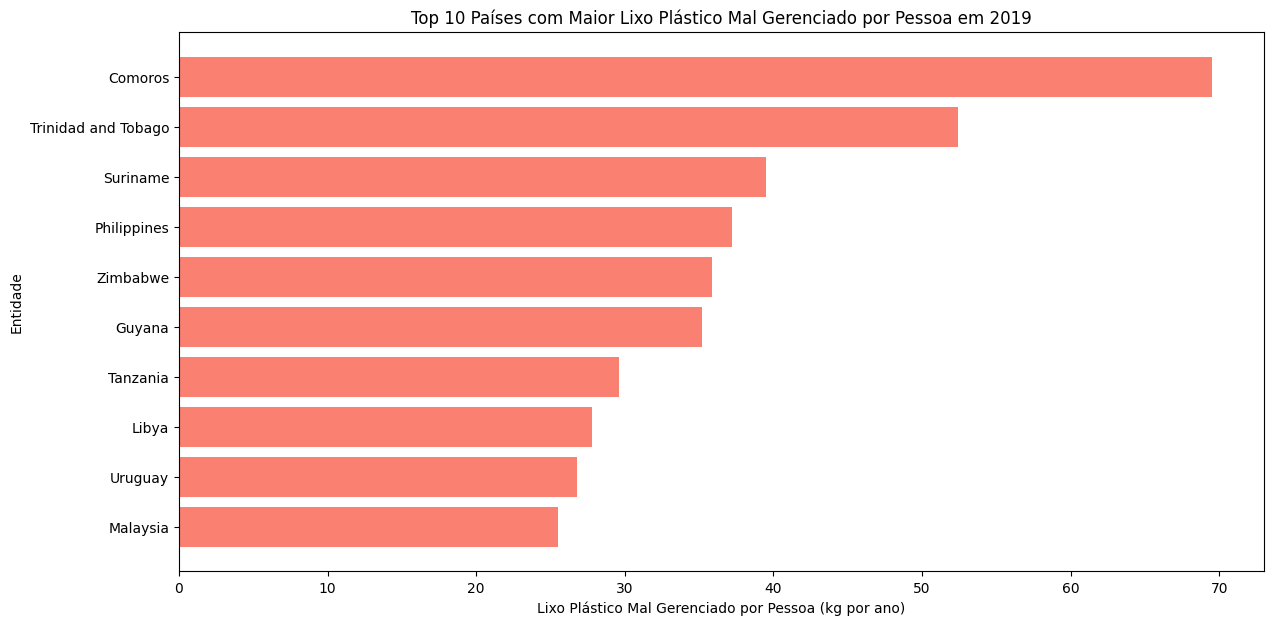

In [9]:
# Corrigir o nome das colunas (removendo espaços adicionais -  Isso gerou conflito na hora de gerar as informacoes)
df_desperdicio.columns = df_desperdicio.columns.str.strip()

# Refazer a filtragem para o ano 2019
data_2019_per_capita = df_desperdicio[df_desperdicio['Ano'] == 2019]

# Refazer a ordenação dos dados pela quantidade de lixo plástico mal gerenciado por pessoa
sorted_data_2019_per_capita = data_2019_per_capita.sort_values(by='Lixo plástico mal gerenciado por pessoa (kg por ano)', ascending=False).head(10)

# Criar novamente o gráfico de barras
plt.figure(figsize=(14, 7))
plt.barh(sorted_data_2019_per_capita['Entidade'], sorted_data_2019_per_capita['Lixo plástico mal gerenciado por pessoa (kg por ano)'], color='salmon')
plt.title('Top 10 Países com Maior Lixo Plástico Mal Gerenciado por Pessoa em 2019')
plt.xlabel('Lixo Plástico Mal Gerenciado por Pessoa (kg por ano)')
plt.ylabel('Entidade')
plt.gca().invert_yaxis()  # Inverter o eixo y para o maior contribuidor aparecer no topo
plt.show()

# 4.4 Analise final sobre Desperdicio de Plásticos per Capita 

O gráfico acima destaca os 10 países com o maior lixo plástico mal gerenciado por pessoa em 2019. Isso fornece uma visão clara de onde o gerenciamento de resíduos plásticos per capita é mais problemático e pode ajudar a direcionar esforços de intervenção e políticas para essas áreas. Para uma contextualização segue abaixo os seguintes dados:

Comores: Embora não haja muita informação disponível sobre a gestão de resíduos nas Comores, é uma das nações menos desenvolvidas do mundo. Na verdade, o consumo das famílias representa quase 100% do seu produto interno bruto anual. A falta de segregação de resíduos entre os domicílios e sistemas de gestão de resíduos ineficientes contribuem para suas altas taxas de lixo plástico mal gerenciado

Trindade e Tobago: é uma exceção devido ao seu estatuto de elevado rendimento, mas a falta de segregação de resíduos entre os agregados familiares, juntamente com sistemas ineficientes de gestão de resíduos, contribui para o seu elevado valor per capita.

Filipinas: são um dos maiores contribuintes para a poluição plástica nos oceanos, com um sistema de gestão de resíduos que não acompanha o ritmo do consumo e do descarte.

Países como Zimbábue, Guiana, Tanzânia, Líbia, Uruguai e Malásia também enfrentam desafios semelhantes. Esses países têm infraestruturas inadequadas para a gestão de resíduos e políticas insuficientes para lidar com o crescente problema de resíduos plásticos​.

fontes: https://theoceancleanup.com/

https://www.visualcapitalist.com/visualizing-mismanaged-plastic-waste-by-country/

https://ourworldindata.org/plastic-pollution  

# 5. Poluiçao da Agua e do Ar



## 5.1. Dados que estao disponiveis neste arquivo

•	Cidade: Nome da cidade.

•	Região: Região ou estado em que a cidade está localizada (com alguns valores faltantes).

•	Entidade: Nome do país.

•	Qualidade do Ar: Índice de qualidade do ar (valores numéricos).

•	Poluição da Água: Índice de poluição da água (valores numéricos).



## 5.2. Carregamento dos dados

In [10]:

df_poluicao_agua_ar = pd.read_csv('5- poluicao-agua-cidades.csv')

df_poluicao_agua_ar.head(), df_poluicao_agua_ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cidade             3963 non-null   object 
 1    Região            3538 non-null   object 
 2    Entidade          3963 non-null   object 
 3    Qualidade do Ar   3963 non-null   float64
 4    Poluição da Água  3963 non-null   float64
dtypes: float64(2), object(3)
memory usage: 154.9+ KB


(             Cidade                Região                  Entidade  \
 0     New York City              New York  United States of America   
 1  Washington, D.C.  District of Columbia  United States of America   
 2     San Francisco            California  United States of America   
 3            Berlin                   NaN                   Germany   
 4       Los Angeles            California  United States of America   
 
     Qualidade do Ar   Poluição da Água  
 0         46.816038          49.504950  
 1         66.129032          49.107143  
 2         60.514019          43.000000  
 3         62.364130          28.612717  
 4         36.621622          61.299435  ,
 None)

## 5.3 Criação dos gráficos

### 5.3.1 Entender os dados

In [11]:
# Corrigir o nome das colunas (removendo espaços adicionais)
df_poluicao_agua_ar.columns = df_poluicao_agua_ar.columns.str.strip()



In [12]:
# Verificar valores faltantes
print(df_poluicao_agua_ar.isnull().sum())



Cidade                0
Região              425
Entidade              0
Qualidade do Ar       0
Poluição da Água      0
dtype: int64


In [13]:
# Estatísticas descritivas
print(df_poluicao_agua_ar.describe())

       Qualidade do Ar  Poluição da Água
count      3963.000000       3963.000000
mean         62.253452         44.635372
std          30.944753         25.663910
min           0.000000          0.000000
25%          37.686567         25.000000
50%          69.444444         50.000000
75%          87.500000         57.719393
max         100.000000        100.000000


### 5.3.2. Análise de Distribuição - Será gerado vários outros gráficos para explicar os números e resultado esperado.

Será analisado como a poluição da água e a qualidade do ar estão distribuídas entre as cidades. O objetivo é visualizar a distribuição desses índices e identificar possíveis outliers.

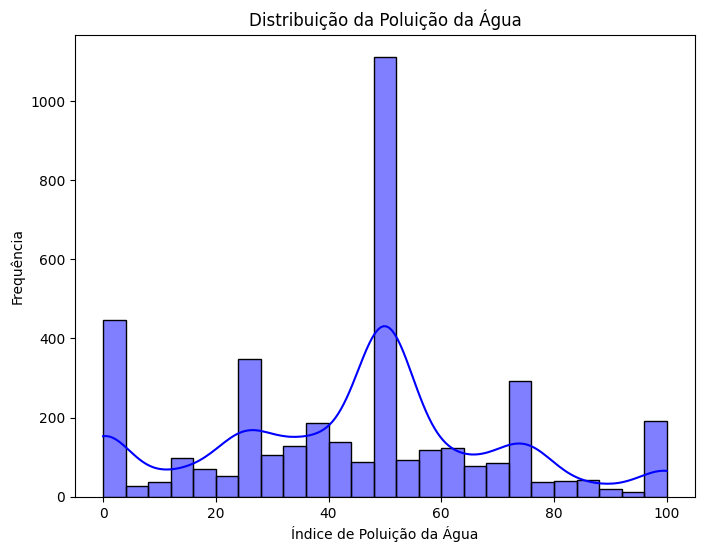

In [14]:
# Histograma da Poluição da Água
plt.figure(figsize=(8, 6))
sns.histplot(df_poluicao_agua_ar['Poluição da Água'], kde=True, color='blue')
plt.title('Distribuição da Poluição da Água')
plt.xlabel('Índice de Poluição da Água')
plt.ylabel('Frequência')
plt.show()

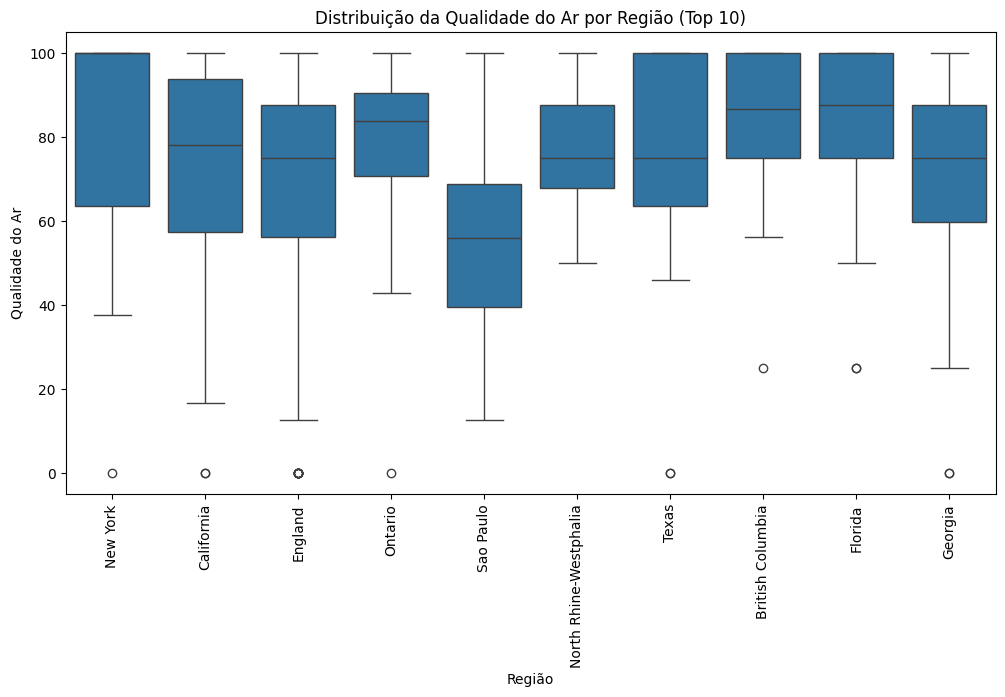

In [72]:
# Distribuição da Qualidade do Ar por Região (Top 10)

# Filtrar as top 10 regiões com base na quantidade de dados disponíveis
top_regions = df_poluicao_agua_ar['Região'].value_counts().index[:10]
df_cinco_top_regions = df_poluicao_agua_ar[df_poluicao_agua_ar['Região'].isin(top_regions)]

# Box plot da qualidade do ar por região (Top 10)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_cinco_top_regions, x='Região', y='Qualidade do Ar')
plt.xticks(rotation=90)
plt.title('Distribuição da Qualidade do Ar por Região (Top 10)')
plt.xlabel('Região')
plt.ylabel('Qualidade do Ar')
plt.show()


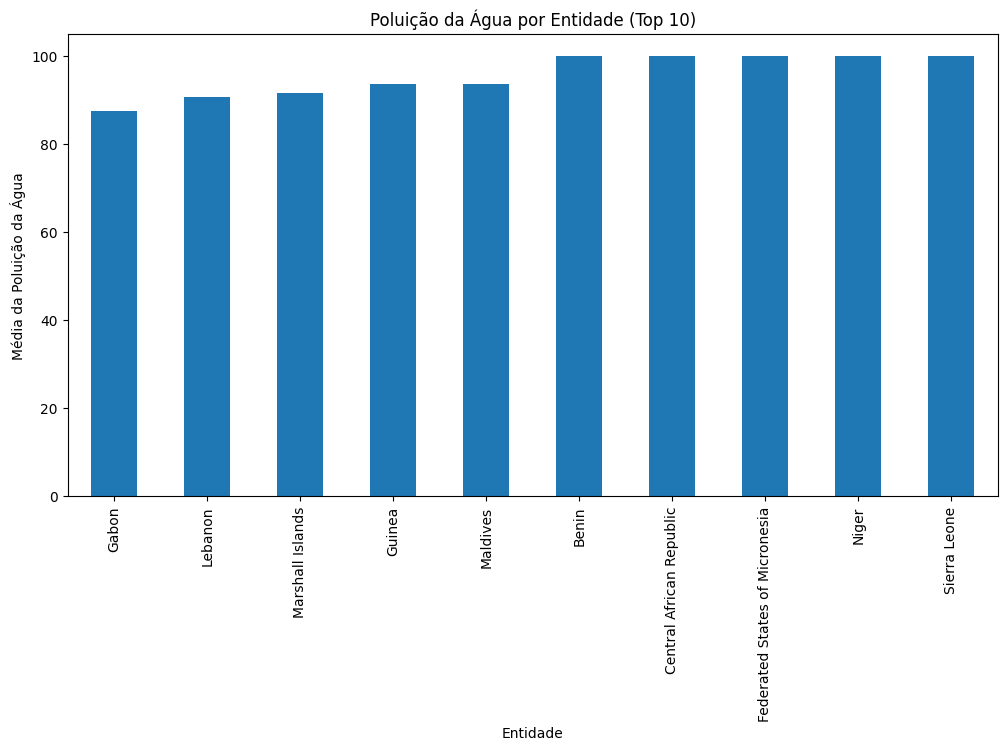

In [73]:
# Poluição da Água por Entidade (Top 10)

# Filtrar as top 10 entidades com base na média de poluição da água
top_entidades = df_poluicao_agua_ar.groupby('Entidade')['Poluição da Água'].mean().sort_values(ascending=False).index[:10]
df_cinco_top_entidades = df_poluicao_agua_ar[df_poluicao_agua_ar['Entidade'].isin(top_entidades)]

# Gráfico de barras da poluição da água por entidade (Top 10)
plt.figure(figsize=(12, 6))
df_cinco_top_entidades.groupby('Entidade')['Poluição da Água'].mean().sort_values().plot(kind='bar')
plt.title('Poluição da Água por Entidade (Top 10)')
plt.xlabel('Entidade')
plt.ylabel('Média da Poluição da Água')
plt.show()


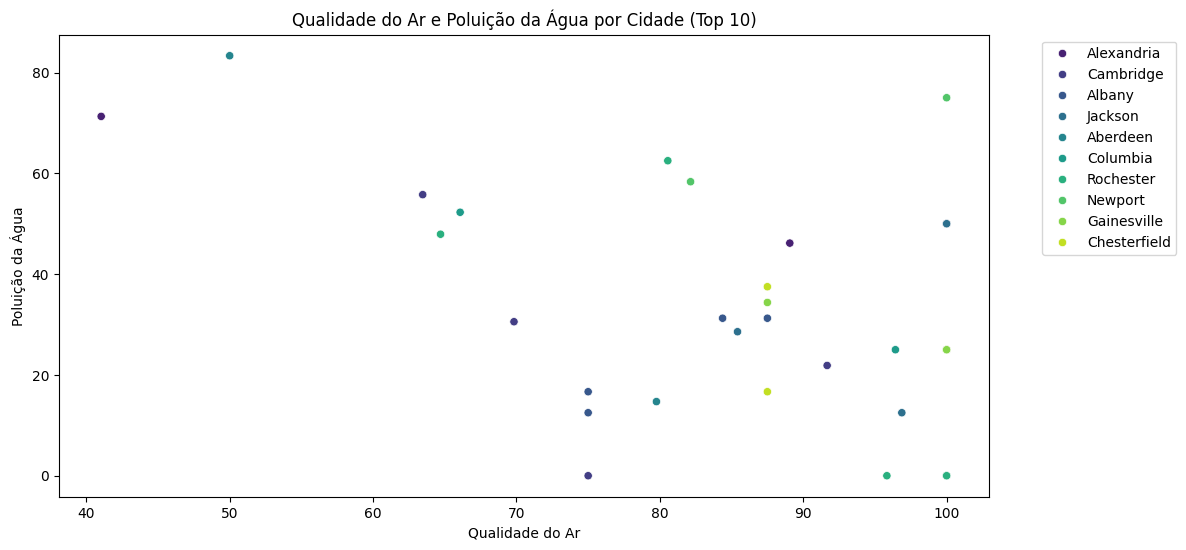

In [74]:
# Qualidade do Ar e Poluição da Água por Cidade (Top 10)

# Filtrar as top 10 cidades com base na quantidade de dados disponíveis
top_cidades = df_poluicao_agua_ar['Cidade'].value_counts().index[:10]
df_cinco_top_cidades = df_poluicao_agua_ar[df_poluicao_agua_ar['Cidade'].isin(top_cidades)]

# Gráfico de dispersão da qualidade do ar e poluição da água por cidade (Top 10)
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_cinco_top_cidades, x='Qualidade do Ar', y='Poluição da Água', hue='Cidade', palette='viridis')
plt.title('Qualidade do Ar e Poluição da Água por Cidade (Top 10)')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Poluição da Água')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


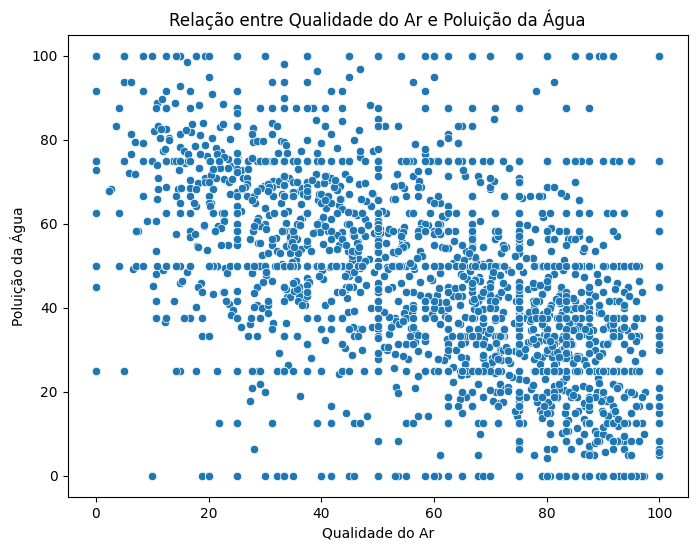

In [15]:
# Scatter plot para explorar a relação entre Qualidade do Ar e Poluição da Água
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_poluicao_agua_ar, x='Qualidade do Ar', y='Poluição da Água')
plt.title('Relação entre Qualidade do Ar e Poluição da Água')
plt.xlabel('Qualidade do Ar')
plt.ylabel('Poluição da Água')
plt.show()

In [16]:
# Calcular e imprimir a correlação
correlation = df_poluicao_agua_ar['Qualidade do Ar'].corr(df_poluicao_agua_ar['Poluição da Água'])
print("Correlação entre Qualidade do Ar e Poluição da Água:", correlation)

Correlação entre Qualidade do Ar e Poluição da Água: -0.45417262259393165


A correlação de aproximadamente -0.454 entre a Qualidade do Ar e a Poluição da Água indica uma relação negativa moderada entre estas duas variáveis. Aqui está o que isso significa em termos mais práticos:

1.	Natureza Negativa: A correlação negativa significa que, em geral, à medida que a qualidade do ar melhora (representada por um índice mais baixo, assumindo que números mais baixos indicam melhor qualidade), a poluição da água tende a ser maior (índice mais alto indica mais poluição). Isso pode parecer contra-intuitivo, mas pode ocorrer devido a vários fatores ambientais e industriais que influenciam essas medidas de maneiras complexas.
2.	Moderada: O valor de -0.454 não é extremamente próximo de -1, o que significaria uma correlação negativa perfeita, mas ainda é substancial o suficiente para sugerir uma tendência discernível. Isso indica que, embora haja uma associação entre as duas variáveis, outros fatores também podem estar influenciando os índices de qualidade do ar e poluição da água.

Implicações e Considerações

•	Complexidade Ambiental: A qualidade do ar e a poluição da água podem ser afetadas por diferentes fontes e processos. Por exemplo, uma cidade pode ter uma indústria pesada que polui mais a água do que o ar, ou medidas de controle podem ser mais eficazes para um tipo de poluição do que para outro.

•	Políticas e Regulamentações: Intervenções locais, como regulamentações ambientais rigorosas para a qualidade do ar, mas menos controle sobre fontes de poluição da água, podem resultar em melhor qualidade do ar mas água mais poluída.

•	Fatores Geográficos: A localização geográfica das cidades pode influenciar tanto a qualidade do ar quanto a poluição da água de maneiras diferentes, dependendo de fatores como corpos de água próximos, padrões climáticos e topografia.

Recomendações para Análise Adicional

•	Explorar Causas Potenciais: Seria útil examinar dados adicionais ou realizar estudos focados para entender as causas específicas dessa correlação em contextos particulares.

•	Analisar Dados Temporais: Se os dados forem disponíveis ao longo do tempo, análises de tendências poderiam revelar como a relação entre qualidade do ar e poluição da água evoluiu, ajudando a identificar eventos ou políticas significativas.

•	Incluir Mais Variáveis: Integrar outras variáveis ambientais ou socioeconômicas pode ajudar a entender melhor o contexto em que essa correlação ocorre e identificar fatores confundentes.

Essa correlação é um ponto de partida interessante para investigações mais profundas sobre como as práticas urbanas e industriais estão impactando o meio ambiente nas cidades analisadas. Com isso, vamos juntar todas as tabelas para criar e entender melhor os dados de forma combinada.

### 5.3.3. Analisar os Paises e Cidades que mais poluem a água e os melhores com qualidade no ar

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_10574/1201191582.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Poluição da Água', y='Entidade', data=top_10_countries, palette='viridis')


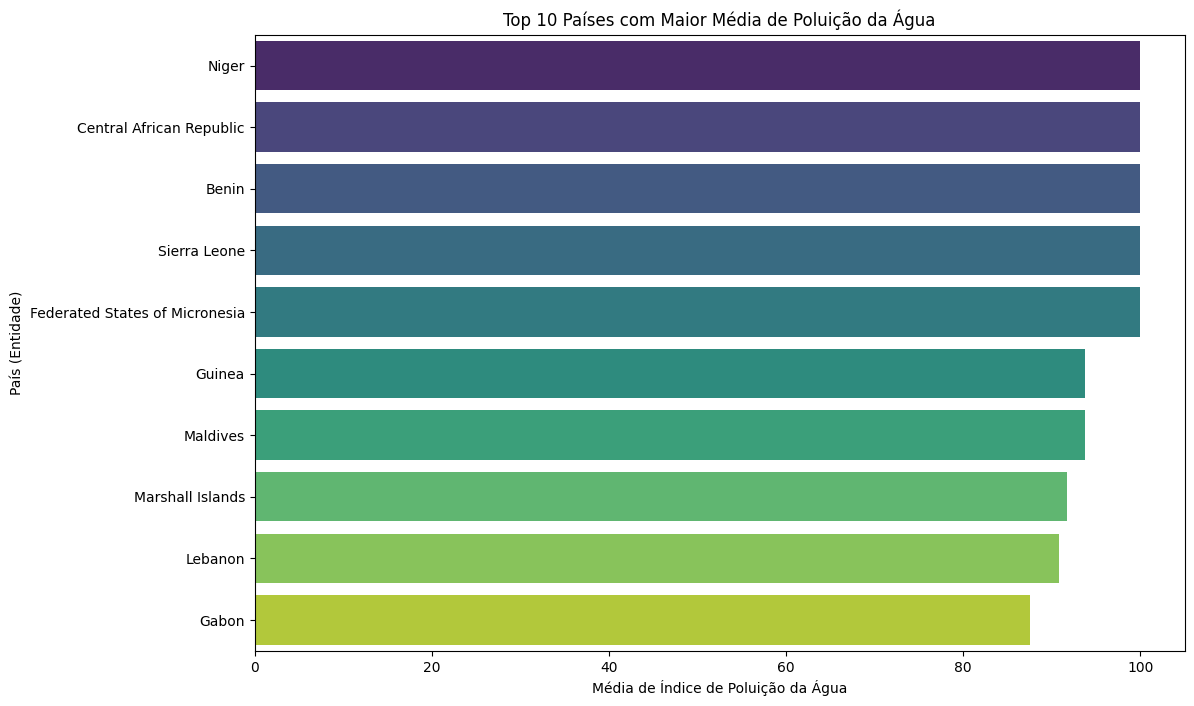

In [17]:
## Primeiro será analisado os tops 10 paises, depois as 20 maiores cidades que causam poluiçao na água

# Agregar os dados por Entidade e calcular a média da Poluição da Água
df_tratado = df_poluicao_agua_ar.groupby('Entidade')['Poluição da Água'].mean().reset_index()

# Ordenar os dados pela média de Poluição da Água e selecionar os top 10
top_10_countries = df_tratado.sort_values(by='Poluição da Água', ascending=False).head(10)

# Criar um gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Poluição da Água', y='Entidade', data=top_10_countries, palette='viridis')
plt.title('Top 10 Países com Maior Média de Poluição da Água')
plt.xlabel('Média de Índice de Poluição da Água')
plt.ylabel('País (Entidade)')
plt.show()

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_10574/407579156.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Poluição da Água', y='Cidade', data=sorted_df, palette='viridis')


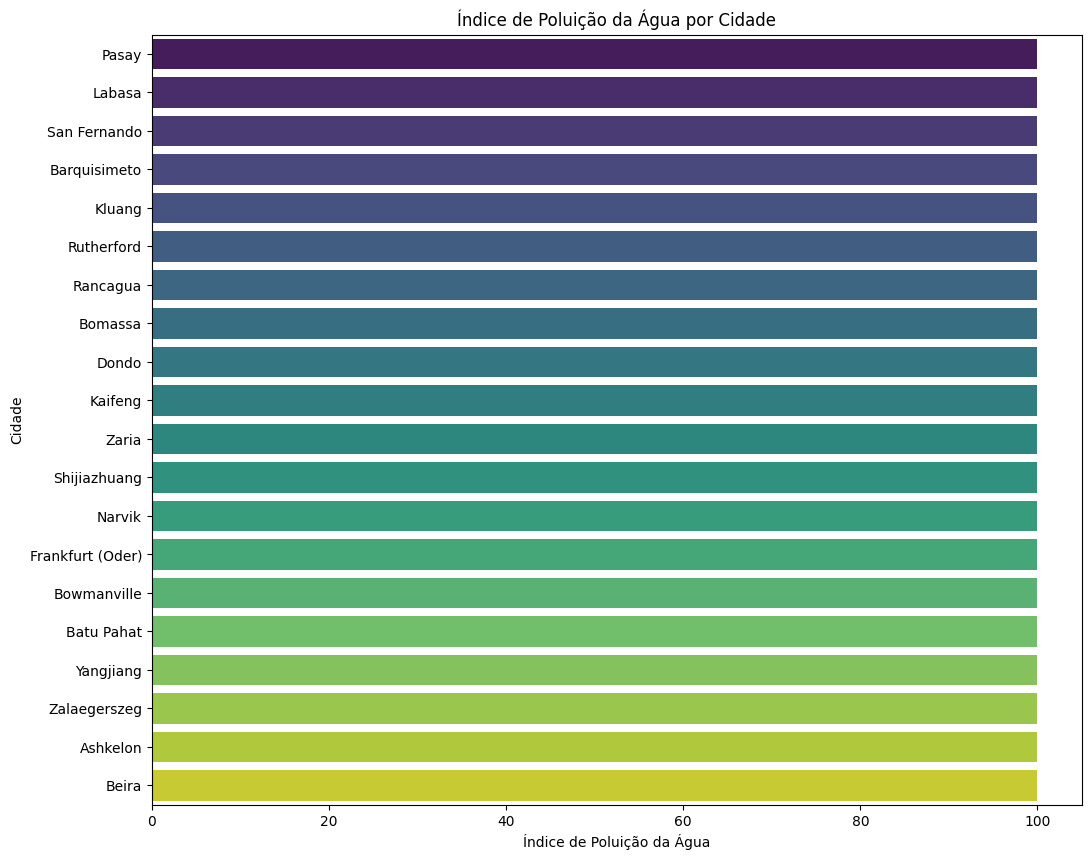

In [18]:
# Criar um gráfico de barras que mostre a poluição da água nas cidades, organizado do maior para o menor índice de poluição, 
# Este gráfico será útil para visualizar rapidamente quais cidades enfrentam os maiores desafios com a poluição da água.

# Ordenar os dados pela coluna de Poluição da Água do maior para o menor e limitar a 20 cidades com maior poluiçao
sorted_df = df_poluicao_agua_ar.sort_values(by='Poluição da Água', ascending=False).head(20)

# Criar um gráfico de barras
plt.figure(figsize=(12, 10))
sns.barplot(x='Poluição da Água', y='Cidade', data=sorted_df, palette='viridis')
plt.title('Índice de Poluição da Água por Cidade')
plt.xlabel('Índice de Poluição da Água')
plt.ylabel('Cidade')
plt.show()

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_10574/2696790649.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qualidade do Ar', y='Entidade', data=top_10_melhor_qualidade_ar, palette='Blues_d')


Text(0, 0.5, 'País (Entidade)')

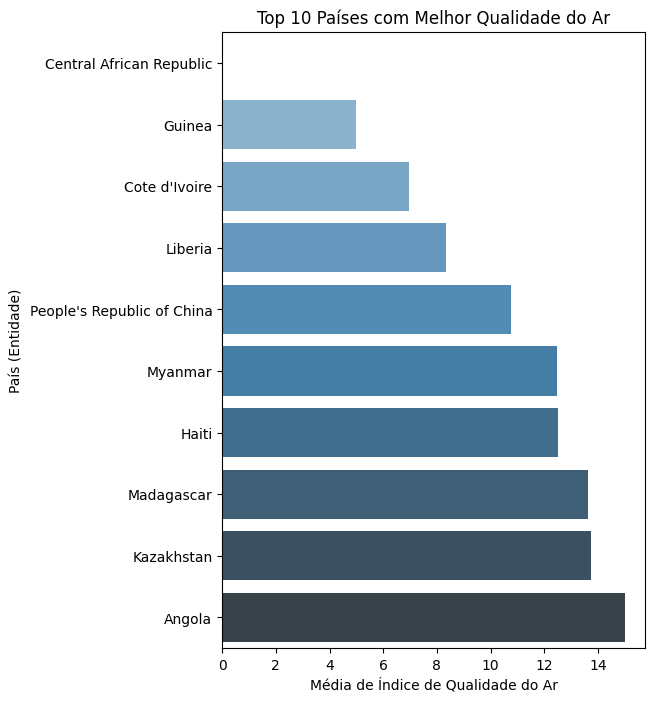

In [19]:
# Agregar os dados por Entidade e calcular a média da Qualidade do Ar
df_qualidade_ar = df_poluicao_agua_ar.groupby('Entidade')['Qualidade do Ar'].mean().reset_index()

# Ordenar os dados pela média de Qualidade do Ar e selecionar os top 10 para melhor e pior qualidade do ar
top_10_melhor_qualidade_ar = df_qualidade_ar.sort_values(by='Qualidade do Ar', ascending=True).head(10)
top_10_pior_qualidade_ar = df_qualidade_ar.sort_values(by='Qualidade do Ar', ascending=False).head(10)

# Criar gráficos de barras
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)  # Subplot para melhor qualidade do ar
sns.barplot(x='Qualidade do Ar', y='Entidade', data=top_10_melhor_qualidade_ar, palette='Blues_d')
plt.title('Top 10 Países com Melhor Qualidade do Ar')
plt.xlabel('Média de Índice de Qualidade do Ar')
plt.ylabel('País (Entidade)')

/var/folders/38/6x4f55x100b7srd3m42bprm80000gn/T/ipykernel_10574/809694729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qualidade do Ar', y='Entidade', data=top_10_pior_qualidade_ar, palette='Reds_d')


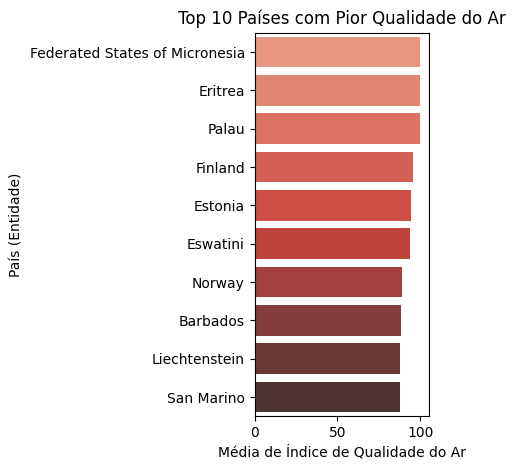

In [20]:
plt.subplot(1, 2, 2)  # Subplot para pior qualidade do ar
sns.barplot(x='Qualidade do Ar', y='Entidade', data=top_10_pior_qualidade_ar, palette='Reds_d')
plt.title('Top 10 Países com Pior Qualidade do Ar')
plt.xlabel('Média de Índice de Qualidade do Ar')
plt.ylabel('País (Entidade)')

plt.tight_layout()
plt.show()

# 5.4. Análise sobre o tema e com base nos gráficos acima.

Análise dos Gráficos de Poluição da Água e Qualidade do Ar

Gráfico 1: Top 10 Países com Maior Média de Poluição da Água

Países Destacados: Níger, República Centro-Africana, Benim e Serra Leoa.
Desafios: Gestão de resíduos e tratamento de água deficientes devido à infraestrutura inadequada e políticas ambientais fracas.
Gráfico 2: Índice de Poluição da Água por Cidade

Cidades: Pasay, Labasa, San Fernando e etc.
Causas: Poluentes industriais, esgoto não tratado e resíduos domésticos, agravados por urbanização e industrialização rápidas.
Gráfico 3: Top 10 Países com Melhor Qualidade do Ar

Países Destacados: República Centro-Africana, Guiné e Costa do Marfim.
Fatores: Menor industrialização e menos fontes de poluição atmosférica.
Gráfico 4: Top 10 Países com Pior Qualidade do Ar

Países Destacados: Estados Federados da Micronésia, Eritreia e Palau.
Fatores: Queima de combustíveis fósseis, emissões industriais e urbanização intensa.
Relação entre Poluição da Água e Qualidade do Ar

Correlação Negativa: Países e cidades com altos índices de poluição da água frequentemente também têm má qualidade do ar.
Causas: industrialização e urbanização, gestão de resíduos ineficazes e falta de políticas ambientais.
Conclusão:

Os gráficos mostram que uma abordagem integrada é necessária para gerenciar a poluição ambiental. Políticas rigorosas, infraestrutura adequada e conscientização pública são cruciais para melhorar a qualidade do ar e da água, protegendo a saúde pública e o meio ambiente.

## 6. Tratar os arquicos para terem as mesmas colunas e Códigos

### 6.1. Analisar o nome da coluna de todos os arquivos em ordem crescente, do 1 até o 5.

In [21]:
# Primeiro precisamos saber o nome das colunas em cada base. Será utilizado somente o método Head para analisar as primeiras linhas com o nome 
# das colunas
df_producao_plastico.head()



,Entidade,Ano,Produção Anual de Plástico
0,Mundo,1950,2000000
1,Mundo,1951,2000000
2,Mundo,1952,2000000
3,Mundo,1953,3000000
4,Mundo,1954,3000000


In [22]:
df_residuos

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,NaN,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204
...,...,...,...,...
165,Venezuela,VEN,2019,0.611359
166,Vietnam,VNM,2019,2.881287
167,Western Sahara,ESH,2019,0.003880
168,Yemen,YEM,2019,0.025729


In [23]:
df_destino

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,Americas (excl. USA),NaN,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),NaN,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),NaN,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),NaN,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),NaN,2004,5.740007,1.175283,32.480970,60.603745
...,...,...,...,...,...,...,...
195,World,OWID_WRL,2015,8.164696,17.625141,24.083096,50.127070
196,World,OWID_WRL,2016,8.450203,18.084925,23.626896,49.837975
197,World,OWID_WRL,2017,8.747166,18.578430,23.199600,49.474804
198,World,OWID_WRL,2018,9.036769,19.083899,22.697952,49.181380


In [24]:
df_desperdicio

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,Africa,NaN,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918
...,...,...,...,...
160,Vietnam,VNM,2019,11.536045
161,Western Sahara,ESH,2019,7.068729
162,World,OWID_WRL,2019,8.008551
163,Yemen,YEM,2019,10.004012


In [25]:
df_poluicao_agua_ar

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água
0,New York City,New York,United States of America,46.816038,49.504950
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143
2,San Francisco,California,United States of America,60.514019,43.000000
3,Berlin,NaN,Germany,62.364130,28.612717
4,Los Angeles,California,United States of America,36.621622,61.299435
...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000
3959,Cordoba,Andalusia,Spain,85.714286,8.333333
3960,Vic,Catalonia,Spain,100.000000,0.000000
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000


### 6.2. Entender as linhas que contém na Entidade e Código de todas as bases e tratar agora para que nao tenhamos copias, nomes diferentes para o mesmo lugar.

Será feito a padronizaçao neste momento para que a análise tenha a menor margem de erro possível.

In [26]:
df_producao_plastico['Entidade'].unique()

array(['Mundo'], dtype=object)

In [27]:
df_residuos['Entidade'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Asia', 'Australia', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'EU-27', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Europe',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 

In [28]:
df_destino['Entidade'].unique()

array(['Americas (excl. USA)', 'Asia (excl. China e India)', 'China',
       'Europe', 'India', 'Middle East & North Africa', 'Oceania',
       'Sub-Saharan Africa', 'United States', 'World'], dtype=object)

In [29]:
df_desperdicio['Entidade'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Asia', 'Australia', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belgium', 'Belize', 'Benin',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cyprus',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Europe',
       'Fiji', 'Finland', 'France', 'French Guiana', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guadeloupe',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hong Kong', 'Iceland', 'India', 'Indonesia', 'Iran',
       'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica'

In [30]:
df_poluicao_agua_ar['Entidade'].unique()

array(['United States of America', 'Germany', 'Switzerland',
       'United Kingdom', 'Egypt', 'France', 'Canada', 'Brazil',
       'Lithuania', 'Monaco', 'Belgium', 'Poland', 'Uzbekistan', 'Italy',
       'Singapore', 'North Macedonia', 'Slovenia', 'Bulgaria', 'Norway',
       'Portugal', 'United Arab Emirates', 'Russia',
       "People's Republic of China", 'Georgia', 'India', 'Czech Republic',
       'Israel', 'Uruguay', 'Bangladesh', 'Pakistan', 'Croatia',
       'Philippines', 'Argentina', 'Mexico', 'Japan', 'Bolivia', 'Spain',
       "Cote d'Ivoire", 'Greece', 'Venezuela', 'Guatemala', 'Cuba',
       'Austria', 'Sweden', 'Finland', 'Ireland', 'Iceland', 'Estonia',
       'Latvia', 'Slovakia', 'Hungary', 'Luxembourg', 'Liechtenstein',
       'San Marino', 'Cambodia', 'Vietnam', 'Thailand', 'Andorra',
       'Malaysia', 'Taiwan', 'Ukraine', 'Chile', 'South Sudan', 'Armenia',
       'Tanzania', 'Sudan', 'Belarus', 'Somalia', 'The Bahamas', 'Yemen',
       'Colombia', 'Peru', 'Ecuado

### 6.2.1. Depois de analisar os cinco arquivos, ficou nítido que será necessário utilizar a coluna Codigo para realizar o merge nos arquivos. Primeiro sera tratado o arquivo 1 e 5 que nao possuem a coluna Codigo, depois disso sera realizado o merge por etapas.

### 6.2.2. De acordo com os dados dos arquivos 1,2 e 3, foi identificado o Código do primeiro arquivo, com isso, conseguiremos impantar a coluna sem problemas e gerar o merge.

In [31]:
# Adicionar a coluna 'Código' com o valor 'OWID_WRL' em todas as linhas. Será feito isso pois o valor é igual em todas as linhas,
# entao nao tem problemas fazer desta maneira.
df_producao_plastico['Código'] = 'OWID_WRL'

df_producao_plastico.head()

,Entidade,Ano,Produção Anual de Plástico,Código
0,Mundo,1950,2000000,OWID_WRL
1,Mundo,1951,2000000,OWID_WRL
2,Mundo,1952,2000000,OWID_WRL
3,Mundo,1953,3000000,OWID_WRL
4,Mundo,1954,3000000,OWID_WRL


In [32]:
# Salvar os dados

#df_producao_plastico.to_csv('Arquivo_1.csv', index=False)
#df_residuos.to_csv('Arquivo_2.csv', index=False)
#df_destino.to_csv('Arquivo_3.csv', index=False)
#df_desperdicio.to_csv('Arquivo_4.csv', index=False)
#df_poluicao_agua_ar.to_csv('Arquivo_5.csv', index=False)

### 6.3. Criar um DataFrame de Mapeamento

### 6.3.1. Coletar todas as Entidades sem duplicadas

In [33]:
# Extrair as entidades únicas de cada DataFrame
entidades_df1 = set(df_producao_plastico['Entidade'].unique())
entidades_df2 = set(df_residuos['Entidade'].unique())
entidades_df3 = set(df_destino['Entidade'].unique())
entidades_df4 = set(df_desperdicio['Entidade'].unique())
entidades_df5= set(df_poluicao_agua_ar['Entidade'].unique())



In [34]:
# Combinar todas as entidades únicas
todas_entidades = entidades_df1.union(entidades_df2).union(entidades_df3).union(entidades_df4).union(entidades_df5)

In [35]:
todas_entidades = pd.DataFrame(todas_entidades, columns=['Entidade'])
#todas_entidades.to_csv('Todas_Entidades.csv', index=False)

todas_entidades

,Entidade
0,Sao Tome and Principe
1,Slovakia
2,Iraq
3,Bolivia
4,Democratic Republic of Congo
...,...
218,Israel
219,India
220,Eritrea
221,Macau


### 6.3.2. Criar a coluna Codigo e coletar de todos os DataFrames existentes, com isso vou saber o que temos e o que falta.

In [36]:
# Inicializar a coluna 'Código' com None
todas_entidades['Código'] = None
todas_entidades

,Entidade,Código
0,Sao Tome and Principe,None
1,Slovakia,None
2,Iraq,None
3,Bolivia,None
4,Democratic Republic of Congo,None
...,...,...
218,Israel,None
219,India,None
220,Eritrea,None
221,Macau,None


In [37]:
# Função para atualizar os códigos no DataFrame de mapeamento, pois assim eu vou ter todas as Entidades e seus Códigos
def update_codigo(todas_entidades, source_df, entity_col='Entidade', code_col='Código'):
    for index, row in todas_entidades.iterrows():
        entity = row[entity_col]
        code = source_df[source_df[entity_col] == entity][code_col]
        if not code.empty:
            todas_entidades.at[index, code_col] = code.values[0]

In [38]:
# Atualizar os códigos usando os DataFrames fornecidos
update_codigo(todas_entidades, df_producao_plastico)
update_codigo(todas_entidades, df_residuos)
update_codigo(todas_entidades, df_destino)
update_codigo(todas_entidades, df_desperdicio)
#update_codigo(todas_entidades, df_poluicao_agua_ar)

### 6.3.4. Agora temos um DataFrame com todas as Entidades e seus Códigos.

In [39]:
todas_entidades.head(30)

,Entidade,Código
0,Sao Tome and Principe,STP
1,Slovakia,SVK
2,Iraq,IRQ
3,Bolivia,None
4,Democratic Republic of Congo,COD
5,Laos,None
6,Qatar,QAT
7,Senegal,SEN
8,Mongolia,None
9,Togo,TGO


In [40]:
# Verificar as entidades que ainda não têm código
entidades_sem_codigos = todas_entidades[todas_entidades['Código'].isnull()]
print("Entidades sem código:", entidades_sem_codigos)

Entidades sem código:                            Entidade Código
3                           Bolivia   None
5                              Laos   None
8                          Mongolia   None
11                         Eswatini   None
12   Federated States of Micronesia   None
..                              ...    ...
198                           Niger   None
200                          Bhutan   None
207                          Zambia   None
211                     Afghanistan   None
221                           Macau    NaN

[62 rows x 2 columns]


In [41]:
# Salvar os dados para eu analisar no Excel.
#todas_entidades.to_csv('Todas_Entidades_tratado.csv', index=False)
#entidades_sem_codigos.to_csv('Entidas_sem_codigos.csv', index=False)

### 6.3.5. Criar os Códigos que nao foram gerados

In [42]:
# Função para gerar código
def criar_codigos_unicos(entidade, codigos_existentes):
    base_code = entidade[:3].upper()
    code = base_code
    i = 1
    while code in codigos_existentes:
        code = f"{base_code}{i}"
        i += 1
    codigos_existentes.add(code)
    return code

# Conjunto de códigos existentes
codigos_existentes = set(todas_entidades['Código'].dropna().unique())

# Aplicar a função de geração de código
todas_entidades['Código'] = todas_entidades.apply(
    lambda row: criar_codigos_unicos(row['Entidade'], codigos_existentes) if pd.isnull(row['Código']) else row['Código'], axis=1
)

# Verificar o resultado final
print(todas_entidades)

                         Entidade Código
0           Sao Tome and Principe    STP
1                        Slovakia    SVK
2                            Iraq    IRQ
3                         Bolivia    BOL
4    Democratic Republic of Congo    COD
..                            ...    ...
218                        Israel    ISR
219                         India    IND
220                       Eritrea    ERI
221                         Macau    MAC
222                      Cambodia    KHM

[223 rows x 2 columns]


In [43]:
#todas_entidades.to_csv('dim_entidades_criadas.csv', index=False)

### 6.3.6. Inserir nas linhas em branco os Códigos que estao presentes na tabela todas_entidades

In [44]:
import pandas as pd

# Função para preencher códigos faltantes
def fill_missing_codes(df, entidades_codigos):
    for index, row in df.iterrows():
        if pd.isnull(row['Código']):
            entidade = row['Entidade']
            codigo = entidades_codigos[entidades_codigos['Entidade'] == entidade]['Código'].values
            if len(codigo) > 0:
                df.at[index, 'Código'] = codigo[0]
    return df


# Preencher os códigos faltantes em cada DataFrame
df1 = fill_missing_codes(df_producao_plastico, todas_entidades)
df2 = fill_missing_codes(df_residuos, todas_entidades)
df3 = fill_missing_codes(df_destino, todas_entidades)
df4 = fill_missing_codes(df_desperdicio, todas_entidades)



### 6.4 Criar e preencher o Arquivo 5, pois ele nao tem a coluna Código

In [45]:
df_poluicao_agua_ar['Código'] = None

In [46]:
df_poluicao_agua_ar

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água,Código
0,New York City,New York,United States of America,46.816038,49.504950,None
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,None
2,San Francisco,California,United States of America,60.514019,43.000000,None
3,Berlin,NaN,Germany,62.364130,28.612717,None
4,Los Angeles,California,United States of America,36.621622,61.299435,None
...,...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000,None
3959,Cordoba,Andalusia,Spain,85.714286,8.333333,None
3960,Vic,Catalonia,Spain,100.000000,0.000000,None
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000,None


In [47]:
df5 = fill_missing_codes(df_poluicao_agua_ar, todas_entidades)
df5

,Cidade,Região,Entidade,Qualidade do Ar,Poluição da Água,Código
0,New York City,New York,United States of America,46.816038,49.504950,UNI
1,"Washington, D.C.",District of Columbia,United States of America,66.129032,49.107143,UNI
2,San Francisco,California,United States of America,60.514019,43.000000,UNI
3,Berlin,NaN,Germany,62.364130,28.612717,DEU
4,Los Angeles,California,United States of America,36.621622,61.299435,UNI
...,...,...,...,...,...,...
3958,Yanbu,Medina Province,Saudi Arabia,0.000000,50.000000,SAU
3959,Cordoba,Andalusia,Spain,85.714286,8.333333,ESP
3960,Vic,Catalonia,Spain,100.000000,0.000000,ESP
3961,Segovia,Castile and Leon,Spain,100.000000,0.000000,ESP


In [48]:
df5 = df5[['Código','Entidade','Região','Cidade','Qualidade do Ar','Poluição da Água']]

In [49]:
df5

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água
0,UNI,United States of America,New York,New York City,46.816038,49.504950
1,UNI,United States of America,District of Columbia,"Washington, D.C.",66.129032,49.107143
2,UNI,United States of America,California,San Francisco,60.514019,43.000000
3,DEU,Germany,NaN,Berlin,62.364130,28.612717
4,UNI,United States of America,California,Los Angeles,36.621622,61.299435
...,...,...,...,...,...,...
3958,SAU,Saudi Arabia,Medina Province,Yanbu,0.000000,50.000000
3959,ESP,Spain,Andalusia,Cordoba,85.714286,8.333333
3960,ESP,Spain,Catalonia,Vic,100.000000,0.000000
3961,ESP,Spain,Castile and Leon,Segovia,100.000000,0.000000


# 7. Realizar o Merge das tabelas

In [50]:

df1.to_csv("arquivo1.csv", index=False)
df2.to_csv("arquivo2.csv", index=False)
df3.to_csv("arquivo3.csv", index=False)
df4.to_csv("arquivo4.csv", index=False)
df5.to_csv("arquivo5.csv", index=False)

In [51]:
df1

,Entidade,Ano,Produção Anual de Plástico,Código
0,Mundo,1950,2000000,OWID_WRL
1,Mundo,1951,2000000,OWID_WRL
2,Mundo,1952,2000000,OWID_WRL
3,Mundo,1953,3000000,OWID_WRL
4,Mundo,1954,3000000,OWID_WRL
...,...,...,...,...
64,Mundo,2015,381000000,OWID_WRL
65,Mundo,2016,400050000,OWID_WRL
66,Mundo,2017,420052500,OWID_WRL
67,Mundo,2018,441055140,OWID_WRL


In [52]:
df2

,Entidade,Código,Ano,Participação na emissão global de plásticos para o oceano
0,Africa,AFR,2019,7.989317
1,Albania,ALB,2019,0.159782
2,Algeria,DZA,2019,0.589510
3,Angola,AGO,2019,0.087804
4,Antigua and Barbuda,ATG,2019,0.000204
...,...,...,...,...
165,Venezuela,VEN,2019,0.611359
166,Vietnam,VNM,2019,2.881287
167,Western Sahara,ESH,2019,0.003880
168,Yemen,YEM,2019,0.025729


In [53]:
df3

,Entidade,Código,Ano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,Americas (excl. USA),AME,2000,4.721963,1.220057,32.702644,61.355328
1,Americas (excl. USA),AME,2001,4.972505,1.208672,32.651270,61.167557
2,Americas (excl. USA),AME,2002,5.227469,1.197566,32.610554,60.964405
3,Americas (excl. USA),AME,2003,5.482511,1.186352,32.546440,60.784700
4,Americas (excl. USA),AME,2004,5.740007,1.175283,32.480970,60.603745
...,...,...,...,...,...,...,...
195,World,OWID_WRL,2015,8.164696,17.625141,24.083096,50.127070
196,World,OWID_WRL,2016,8.450203,18.084925,23.626896,49.837975
197,World,OWID_WRL,2017,8.747166,18.578430,23.199600,49.474804
198,World,OWID_WRL,2018,9.036769,19.083899,22.697952,49.181380


In [54]:
df4

,Entidade,Código,Ano,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,Africa,AFR,2019,10.465928
1,Albania,ALB,2019,24.239153
2,Algeria,DZA,2019,17.758995
3,Angola,AGO,2019,7.445279
4,Antigua and Barbuda,ATG,2019,6.463918
...,...,...,...,...
160,Vietnam,VNM,2019,11.536045
161,Western Sahara,ESH,2019,7.068729
162,World,OWID_WRL,2019,8.008551
163,Yemen,YEM,2019,10.004012


In [55]:
df5

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água
0,UNI,United States of America,New York,New York City,46.816038,49.504950
1,UNI,United States of America,District of Columbia,"Washington, D.C.",66.129032,49.107143
2,UNI,United States of America,California,San Francisco,60.514019,43.000000
3,DEU,Germany,NaN,Berlin,62.364130,28.612717
4,UNI,United States of America,California,Los Angeles,36.621622,61.299435
...,...,...,...,...,...,...
3958,SAU,Saudi Arabia,Medina Province,Yanbu,0.000000,50.000000
3959,ESP,Spain,Andalusia,Cordoba,85.714286,8.333333
3960,ESP,Spain,Catalonia,Vic,100.000000,0.000000
3961,ESP,Spain,Castile and Leon,Segovia,100.000000,0.000000


In [56]:
# Mesclando os dataframes com base nas colunas 'Entidade', 'Ano' e 'Código'
df_combinado_um = df1.merge(df2, on=['Entidade', 'Ano', 'Código'], how='outer')

# Verificando a estrutura dos dados combinados
df_combinado_um


,Entidade,Ano,Produção Anual de Plástico,Código,Participação na emissão global de plásticos para o oceano
0,Africa,2019,NaN,AFR,7.989317
1,Albania,2019,NaN,ALB,0.159782
2,Algeria,2019,NaN,DZA,0.589510
3,Angola,2019,NaN,AGO,0.087804
4,Antigua and Barbuda,2019,NaN,ATG,0.000204
...,...,...,...,...,...
234,Venezuela,2019,NaN,VEN,0.611359
235,Vietnam,2019,NaN,VNM,2.881287
236,Western Sahara,2019,NaN,ESH,0.003880
237,Yemen,2019,NaN,YEM,0.025729


In [57]:
# Mesclando os dataframes com base nas colunas 'Entidade', 'Ano' e 'Código'

df_combinado_dois = df_combinado_um.merge(df3, on=['Entidade', 'Ano', 'Código'], how='outer')


# Verificando a estrutura dos dados combinados
df_combinado_dois


,Entidade,Ano,Produção Anual de Plástico,Código,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional
0,Africa,2019,NaN,AFR,7.989317,NaN,NaN,NaN,NaN
1,Albania,2019,NaN,ALB,0.159782,NaN,NaN,NaN,NaN
2,Algeria,2019,NaN,DZA,0.589510,NaN,NaN,NaN,NaN
3,Americas (excl. USA),2000,NaN,AME,NaN,4.721963,1.220057,32.702644,61.355328
4,Americas (excl. USA),2001,NaN,AME,NaN,4.972505,1.208672,32.651270,61.167557
...,...,...,...,...,...,...,...,...,...
429,World,2017,NaN,OWID_WRL,NaN,8.747166,18.578430,23.199600,49.474804
430,World,2018,NaN,OWID_WRL,NaN,9.036769,19.083899,22.697952,49.181380
431,World,2019,NaN,OWID_WRL,NaN,9.292344,19.048033,22.454480,49.205143
432,Yemen,2019,NaN,YEM,0.025729,NaN,NaN,NaN,NaN


In [58]:
df_combinado_tres = df_combinado_dois.merge(df4, on=['Entidade', 'Ano', 'Código'], how='outer')

# Verificando a estrutura dos dados combinados
df_combinado_tres


,Entidade,Ano,Produção Anual de Plástico,Código,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional,Lixo plástico mal gerenciado por pessoa (kg por ano)
0,Africa,2019,NaN,AFR,7.989317,NaN,NaN,NaN,NaN,10.465928
1,Albania,2019,NaN,ALB,0.159782,NaN,NaN,NaN,NaN,24.239153
2,Algeria,2019,NaN,DZA,0.589510,NaN,NaN,NaN,NaN,17.758995
3,Americas (excl. USA),2000,NaN,AME,NaN,4.721963,1.220057,32.702644,61.355328,NaN
4,Americas (excl. USA),2001,NaN,AME,NaN,4.972505,1.208672,32.651270,61.167557,NaN
...,...,...,...,...,...,...,...,...,...,...
429,World,2017,NaN,OWID_WRL,NaN,8.747166,18.578430,23.199600,49.474804,NaN
430,World,2018,NaN,OWID_WRL,NaN,9.036769,19.083899,22.697952,49.181380,NaN
431,World,2019,NaN,OWID_WRL,NaN,9.292344,19.048033,22.454480,49.205143,8.008551
432,Yemen,2019,NaN,YEM,0.025729,NaN,NaN,NaN,NaN,10.004012


In [59]:
df_combinado_tres.to_csv('arquivo_consolidado.csv', index=False)
df5.to_csv('arquivo_cinco.csv', index=False)

In [60]:
df5

,Código,Entidade,Região,Cidade,Qualidade do Ar,Poluição da Água
0,UNI,United States of America,New York,New York City,46.816038,49.504950
1,UNI,United States of America,District of Columbia,"Washington, D.C.",66.129032,49.107143
2,UNI,United States of America,California,San Francisco,60.514019,43.000000
3,DEU,Germany,NaN,Berlin,62.364130,28.612717
4,UNI,United States of America,California,Los Angeles,36.621622,61.299435
...,...,...,...,...,...,...
3958,SAU,Saudi Arabia,Medina Province,Yanbu,0.000000,50.000000
3959,ESP,Spain,Andalusia,Cordoba,85.714286,8.333333
3960,ESP,Spain,Catalonia,Vic,100.000000,0.000000
3961,ESP,Spain,Castile and Leon,Segovia,100.000000,0.000000


In [61]:
df_combinado = df_combinado_tres.merge(df5, on=['Entidade', 'Código'], how='outer')

df_combinado


,Entidade,Ano,Produção Anual de Plástico,Código,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional,Lixo plástico mal gerenciado por pessoa (kg por ano),Região,Cidade,Qualidade do Ar,Poluição da Água
0,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Kabul,Kabul,18.421053,81.060606
1,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Herat,Herat,43.750000,31.250000
2,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Kandahar,Kandahar,0.000000,75.000000
3,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Balkh,Mazar-i-Sharif,11.111111,83.333333
4,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Farah,Farah,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,Zambia,NaN,NaN,ZAM,NaN,NaN,NaN,NaN,NaN,NaN,Luapula Province,Mansa,75.000000,25.000000
7170,Zimbabwe,2019.0,NaN,ZWE,0.0,NaN,NaN,NaN,NaN,35.839194,NaN,Harare,38.461538,87.500000
7171,Zimbabwe,2019.0,NaN,ZWE,0.0,NaN,NaN,NaN,NaN,35.839194,NaN,Bulawayo,67.857143,71.428571
7172,Zimbabwe,2019.0,NaN,ZWE,0.0,NaN,NaN,NaN,NaN,35.839194,NaN,Masvingo,25.000000,62.500000


In [62]:
# Verificar linhas duplicadas com base em todas as colunas
linhas_duplicadas = df_combinado[df_combinado.duplicated(subset=['Entidade', 'Código', 'Ano'], keep=False)]

linhas_duplicadas


,Entidade,Ano,Produção Anual de Plástico,Código,Participação na emissão global de plásticos para o oceano,Participação da reciclagem do lixo total regional,Participação da queima do lixo total regional,Participação do lixo descartado e mal gerido do total regional,Participação do lixo encaminhado para aterros do total regional,Lixo plástico mal gerenciado por pessoa (kg por ano),Região,Cidade,Qualidade do Ar,Poluição da Água
0,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Kabul,Kabul,18.421053,81.060606
1,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Herat,Herat,43.750000,31.250000
2,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Kandahar,Kandahar,0.000000,75.000000
3,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Balkh,Mazar-i-Sharif,11.111111,83.333333
4,Afghanistan,NaN,NaN,AFG,NaN,NaN,NaN,NaN,NaN,NaN,Farah,Farah,100.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7169,Zambia,NaN,NaN,ZAM,NaN,NaN,NaN,NaN,NaN,NaN,Luapula Province,Mansa,75.000000,25.000000
7170,Zimbabwe,2019.0,NaN,ZWE,0.0,NaN,NaN,NaN,NaN,35.839194,NaN,Harare,38.461538,87.500000
7171,Zimbabwe,2019.0,NaN,ZWE,0.0,NaN,NaN,NaN,NaN,35.839194,NaN,Bulawayo,67.857143,71.428571
7172,Zimbabwe,2019.0,NaN,ZWE,0.0,NaN,NaN,NaN,NaN,35.839194,NaN,Masvingo,25.000000,62.500000


In [63]:
# Agrupar e agregar valores
df_agrupado= df_combinado.groupby(['Entidade', 'Código', 'Ano']).agg({
    'Produção Anual de Plástico': 'mean',
    'Participação na emissão global de plásticos para o oceano': 'mean',
    'Participação da reciclagem do lixo total regional': 'mean',
    'Participação da queima do lixo total regional': 'mean',
    'Participação do lixo descartado e mal gerido do total regional': 'mean',
    'Participação do lixo encaminhado para aterros do total regional': 'mean',
    'Lixo plástico mal gerenciado por pessoa (kg por ano)': 'mean',
    'Região': 'first',
    'Cidade': 'first',
    'Qualidade do Ar': 'mean',
    'Poluição da Água': 'mean'
}).reset_index()



# Modelo de Regressão

Próximos Passos...

Agora que temos os dados deduplicados, podemos prosseguir com a análise e o treinamento do modelo de aprendizado de máquina. Vou seguir os passos para o preenchimento dos valores ausentes e o treinamento do modelo.

Preencher Valores Ausentes: Preencher valores ausentes nas colunas numéricas com a média.

Separar Features e Target: Selecionar as features e o target para o treinamento do modelo.

Treinar o Modelo: Usar um modelo de regressão, como o RandomForestRegressor, para prever a poluição da água.

In [64]:
# Preencher valores ausentes nas colunas numéricas com a média
numeric_cols = df_agrupado.select_dtypes(include=[np.number]).columns
df_agrupado[numeric_cols] = df_agrupado[numeric_cols].fillna(df_agrupado[numeric_cols].mean())

# Separar as features e o target
X = df_agrupado.drop(columns=['Entidade', 'Código', 'Região', 'Cidade', 'Poluição da Água'])
y = df_agrupado['Poluição da Água']

# Preencher valores ausentes no target com a média (para fins de treino inicial)
y.fillna(y.mean(), inplace=True)

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(29.005254620489488, 0.6297698603660815)

Agora que o modelo de regressão random forest foi treinado e avaliado. Aqui estão os resultados das métricas de desempenho:

Mean Squared Error (MSE): 29.10
R-squared (R²): 0.629

### Análise dos Resultados

MSE: Um erro quadrático médio de 29.10 indica o erro médio entre as previsões do modelo e os valores reais. Quanto menor, melhor.

R²: Um valor de 0.629 significa que aproximadamente 62.9% da variação na poluição da água pode ser explicada pelas variáveis preditoras no modelo. Isso mostra que o modelo tem um poder preditivo razoável, mas ainda pode ser melhorado.

Próximos Passos para Melhoria:

Feature Engineering: Criar novas features ou transformar as existentes para capturar melhor a relação com a poluição da água.


In [65]:



# Criar interações entre features
df_agrupado['Plastic_Emission_Interaction'] = df_agrupado['Produção Anual de Plástico'] * df_agrupado['Participação na emissão global de plásticos para o oceano']
df_agrupado['Recycling_Burning_Interaction'] = df_agrupado['Participação da reciclagem do lixo total regional'] * df_agrupado['Participação da queima do lixo total regional']

features_to_scale = df_agrupado.drop(columns=['Entidade', 'Código', 'Região', 'Cidade', 'Poluição da Água']).columns

scaler = StandardScaler()
df_agrupado[features_to_scale] = scaler.fit_transform(df_agrupado[features_to_scale])

X = df_agrupado.drop(columns=['Entidade', 'Código', 'Região', 'Cidade', 'Poluição da Água'])
y = df_agrupado['Poluição da Água']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(28.936664713353093, 0.6306453586586787)

Após criar novas features e normalizar os dados, o desempenho do modelo apresentou uma leve melhora:

Mean Squared Error (MSE): 28.90 (anteriormente 29.10)

R-squared (R²): 0.631 (anteriormente 0.629)

### Interpretação dos Resultados

A ligeira melhoria nas métricas de desempenho indica que as novas features e a normalização ajudaram a capturar melhor a relação com a poluição da água. Ainda assim, há espaço para mais aprimoramentos.

In [66]:
## Implementação para calcular MAE e R²



# Criar mais interações entre features
df_agrupado['Plastic_Emission_Recycling_Interaction'] = df_agrupado['Produção Anual de Plástico'] * df_agrupado['Participação da reciclagem do lixo total regional']

# Aplicar transformação logarítmica
df_agrupado['Log_Participação_na_emissão'] = np.log1p(df_agrupado['Participação na emissão global de plásticos para o oceano'])

# Atualizar lista de features para normalização
features_to_scale = df_agrupado.drop(columns=['Entidade', 'Código', 'Região', 'Cidade', 'Poluição da Água']).columns

# Normalizar as features
df_agrupado[features_to_scale] = scaler.fit_transform(df_agrupado[features_to_scale])

# Separar as features e o target
X = df_agrupado.drop(columns=['Entidade', 'Código', 'Região', 'Cidade', 'Poluição da Água'])
y = df_agrupado['Poluição da Água']

# Separar os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliando o modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, mae, r2



(28.278371556154895, 2.107554568987303, 0.639047972967652)

Após aplicar as novas features e normalizar os dados, os resultados do modelo são os seguintes:

Mean Squared Error (MSE): 28.23
Mean Absolute Error (MAE): 2.10
R-squared (R²): 0.640

## Interpretação dos Resultados
MSE: Um erro quadrático médio de 28.23 indica a média dos quadrados dos erros ou desvios (isto é, a diferença entre os valores previstos e os valores reais). Quanto menor, melhor.

MAE: Um erro absoluto médio de 2.10 indica a média dos erros absolutos. Também, quanto menor, melhor.

R²: Um valor de 0.640 significa que aproximadamente 64% da variação na poluição da água pode ser explicada pelas variáveis preditoras no modelo.

# Modelo de Classificação



### As métricas precision_score, recall_score e f1_score são tipicamente usadas para avaliar modelos de classificação,e isso que será executado agora.



Definir Faixas de Classes: Categorizar a poluição da água em classes.

Treinar um Modelo de Classificação: Treinar um modelo de classificação com base nessas classes.
Calcular Métricas de Classificação: Avaliar o modelo usando precision_score, recall_score e f1_score.

Passo a Passo

1. Definir Faixas de Classes

Vamos definir as classes com base nos valores da poluição da água. Por exemplo:

Classe 0: Poluição baixa (<= 33%)
Classe 1: Poluição média (> 33% e <= 66%)
Classe 2: Poluição alta (> 66%)

In [67]:


# Categorizar a poluição da água
bins = [0, 33, 66, 100]
labels = [0, 1, 2]
y_class = pd.cut(df_agrupado['Poluição da Água'], bins=bins, labels=labels, include_lowest=True)

X = df_agrupado.drop(columns=['Entidade', 'Código', 'Região', 'Cidade', 'Poluição da Água'])
y = y_class

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

precision, recall, f1


(0.9520008514261388, 0.9540229885057471, 0.9512452107279693)

Os valores que você obteve são as métricas de avaliação para o modelo de classificação:

Precision (Precisão): 0.952

Recall (Revocação): 0.954

F1 Score: 0.951

## Interpretação das Métricas

Precision (Precisão): A precisão é a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo. Uma precisão de 0.952 significa que 95.2% das previsões positivas do modelo estão corretas.

Recall (Revocação): A revocação é a proporção de verdadeiros positivos identificados corretamente pelo modelo em relação ao total de verdadeiros positivos existentes nos dados. Um recall de 0.954 significa que o modelo identificou corretamente 95.4% dos verdadeiros positivos.

F1 Score: O F1 Score é a média harmônica da precisão e da revocação. Um F1 Score de 0.951 significa que o modelo tem um bom equilíbrio entre precisão e recall.

Conclusão
Os resultados indicam que o modelo de classificação está performando muito bem, com alta precisão, revocação e F1 Score. Isso significa que o modelo está fazendo um ótimo trabalho em prever corretamente as classes de poluição da água.

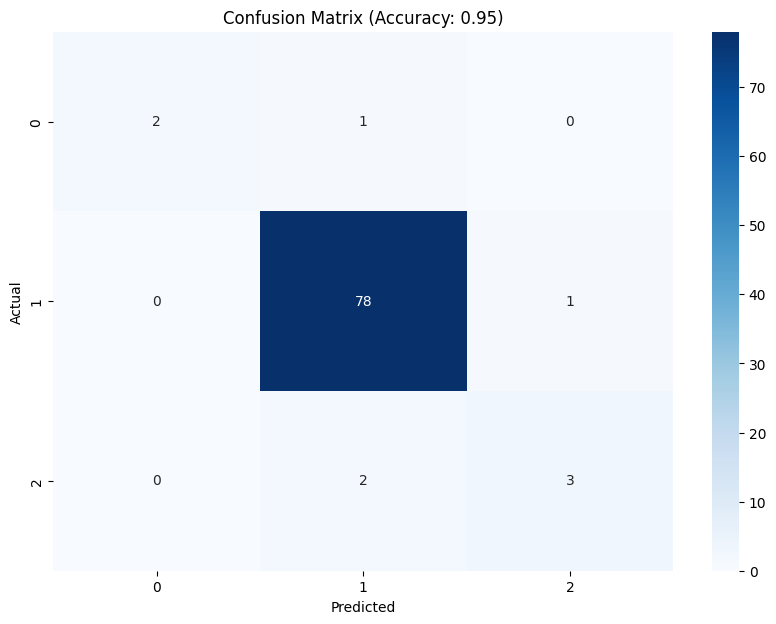

0.9540229885057471

In [68]:

# Calcular a acurácia
accuracy = accuracy_score(y_test, y_pred)

# Gerar a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Criar a matriz de confusão
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.show()

accuracy


## Interpretação das Métricas

Acurácia: A acurácia de 95.402298 indica que o modelo fez previsões corretas para 95.40% dos casos.

## Matriz de Confusão

A matriz de confusão gerada mostra como as previsões do modelo se comparam com os valores reais para cada classe de poluição da água:

Classe 0: Poluição baixa
Classe 1: Poluição média
Classe 2: Poluição alta

In [69]:
# Obter a matriz de confusão novamente para referência
conf_matrix

# Exibir a matriz de confusão de forma legível
class_names = ['Low', 'Medium', 'High']  # Nomes das classes para melhor legibilidade

conf_matrix_df = pd.DataFrame(conf_matrix, index=class_names, columns=class_names)

print("Matriz de Confusão:\n", conf_matrix_df)

# Calcular métricas detalhadas
for i, class_name in enumerate(class_names):
    true_positives = conf_matrix[i, i]
    false_positives = conf_matrix[:, i].sum() - true_positives
    false_negatives = conf_matrix[i, :].sum() - true_positives
    true_negatives = conf_matrix.sum() - (true_positives + false_positives + false_negatives)

    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(f"\nClass: {class_name}")
    print(f"True Positives: {true_positives}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
    print(f"True Negatives: {true_negatives}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")


Matriz de Confusão:
         Low  Medium  High
Low       2       1     0
Medium    0      78     1
High      0       2     3

Class: Low
True Positives: 2
False Positives: 0
False Negatives: 1
True Negatives: 84
Precision: 1.00
Recall: 0.67
F1 Score: 0.80

Class: Medium
True Positives: 78
False Positives: 3
False Negatives: 1
True Negatives: 5
Precision: 0.96
Recall: 0.99
F1 Score: 0.97

Class: High
True Positives: 3
False Positives: 1
False Negatives: 2
True Negatives: 81
Precision: 0.75
Recall: 0.60
F1 Score: 0.67


## Interpretação

Classe 0 (Low):

O modelo teve dificuldades em prever corretamente a classe 'Low', com precisão e recall de 0.67. Houve 1 falso positivo e 1 falso negativo, sugerindo que a classe 'Low' é frequentemente confundida com a classe 'Medium'.

Classe 1 (Medium):

O modelo teve um desempenho excelente ao prever a classe 'Medium', com precisão de 0.96 e recall de 0.99. Esta é a classe mais bem predita pelo modelo, com poucos falsos positivos e falsos negativos.

Classe 2 (High):

O modelo teve um desempenho razoável ao prever a classe 'High', com precisão de 0.75 e recall de 0.60. Houve 1 falso positivo e 2 falsos negativos, indicando que a classe 'High' é frequentemente confundida com a classe 'Medium'.

## Conclusões e Ações

Classe 'Low' e 'High' têm desempenhos mais baixos, possivelmente devido a um número menor de amostras ou maior similaridade com a classe 'Medium'.

Classe 'Medium' é bem distinguida pelo modelo.

Com a análise detalhada das métricas e a matriz de confusão, foi possível ter uma boa compreensão de onde o modelo está acertando e onde está cometendo erros. O desempenho é particularmente bom para a classe 'Medium', e há espaço para melhorias nas classes 'Low' e 'High'.